In [1]:
import os

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import cv2

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
from tensorflow.keras.models import Sequential, Model

In [8]:
from tensorflow.keras.preprocessing import image

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input, Lambda, MaxPooling2D,Dropout

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16

In [12]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.decomposition import PCA

In [19]:
from sklearn import svm

In [20]:
import PIL

In [21]:
from PIL import UnidentifiedImageError

In [22]:
import glob

In [23]:
imgs_ = glob.glob("Dataset/*/*.jpg")

for img in imgs_:
    try:
        img = PIL.Image.open(img)
    except PIL.UnidentifiedImageError:
        os.remove(img)
        print(img)

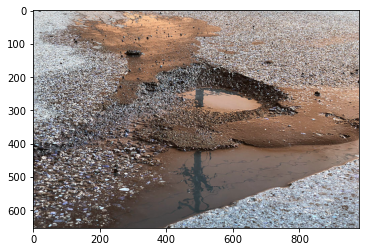

In [24]:
plt.imshow(cv2.imread("Dataset/potholes/1.jpg"))

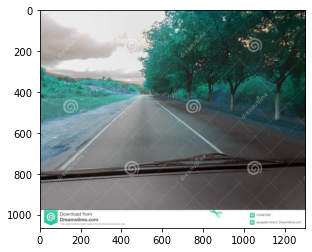

In [25]:
plt.imshow(cv2.imread("Dataset/normal/7.jpg"))

In [26]:
path = 'Dataset/normal'
image_path=[]
target=[]

In [27]:
for i in os.listdir(path):
    image_path.append(os.path.join(path,i))
    target.append(0)

In [28]:
path = 'Dataset/potholes'
for i in os.listdir(path):
    image_path.append(os.path.join(path,i))
    target.append(1)

In [29]:
table = {'image_path': image_path, 'target': target}
df = pd.DataFrame(data=table)
df = df.sample(frac = 1).reset_index(drop=True) 
df = df.drop([29]).reset_index(drop=True)

In [30]:
df.head(10)

,image_path,target
0,Dataset/normal\8.jpg,0
1,Dataset/normal\14.jpg,0
2,Dataset/normal\300.jpg,0
3,Dataset/potholes\266.jpg,1
4,Dataset/potholes\147.jpg,1
5,Dataset/normal\225.jpg,0
6,Dataset/potholes\51.jpg,1
7,Dataset/normal\205.jpg,0
8,Dataset/potholes\302.jpg,1
9,Dataset/potholes\199.jpg,1


In [31]:
df.sample(10)

,image_path,target
41,Dataset/potholes\173.jpg,1
393,Dataset/potholes\32.jpg,1
1,Dataset/normal\14.jpg,0
354,Dataset/normal\340.jpg,0
309,Dataset/potholes\10.jpg,1
269,Dataset/potholes\249.jpg,1
252,Dataset/potholes\221.jpg,1
98,Dataset/normal\228.jpg,0
132,Dataset/normal\251.jpg,0
464,Dataset/potholes\200.jpg,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  656 non-null    object
 1   target      656 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.4+ KB


In [33]:
df.isna().sum()

image_path    0
target        0
dtype: int64

s:\anacondaprogramdata\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'samples')

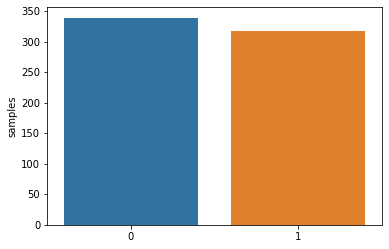

In [34]:
x=df.target.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

In [35]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, validation_split=0.2)

In [36]:
training_set = train_datagen.flow_from_directory('./Dataset', target_size = (64, 64),
                                                 batch_size = 32, class_mode = 'binary', subset="training")

Found 526 images belonging to 2 classes.


In [37]:
validation_generator = train_datagen.flow_from_directory(
    "./Dataset", 
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 131 images belonging to 2 classes.


In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [40]:
model.add(MaxPool2D(pool_size=2, strides=2))

In [41]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

In [42]:
model.add(MaxPool2D(pool_size=2, strides=2))

In [43]:
model.add(Flatten())

In [44]:
model.add(Dense(units=128, activation='relu'))

In [45]:
model.add(Dense(units=1, activation='sigmoid'))

In [46]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [47]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [48]:
history = model.fit(x = training_set, validation_data = validation_generator, epochs = 25)

Epoch 1/25
17/17 [==============================] - 14s 803ms/step - loss: 0.6766 - accuracy: 0.5856 - val_loss: 0.5657 - val_accuracy: 0.7099
Epoch 2/25
17/17 [==============================] - 12s 743ms/step - loss: 0.4372 - accuracy: 0.8099 - val_loss: 0.4912 - val_accuracy: 0.7786
Epoch 3/25
17/17 [==============================] - 13s 773ms/step - loss: 0.2801 - accuracy: 0.8878 - val_loss: 0.3744 - val_accuracy: 0.8397
Epoch 4/25
17/17 [==============================] - 14s 813ms/step - loss: 0.3163 - accuracy: 0.8783 - val_loss: 0.5268 - val_accuracy: 0.7786
Epoch 5/25
17/17 [==============================] - 13s 788ms/step - loss: 0.3486 - accuracy: 0.8422 - val_loss: 0.4458 - val_accuracy: 0.7481
Epoch 6/25
 7/17 [===========>..................] - ETA: 4s - loss: 0.2246 - accuracy: 0.9152

KeyboardInterrupt: 

In [ ]:
history.history

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Analysis of the model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Value Accuracy'], loc='upper right')
plt.show()

In [ ]:
def predictImg(imgpath):
    predict_image = image.load_img(imgpath, target_size = (64,64))
    predict_image = image.img_to_array(predict_image)
    predict_image = np.expand_dims(predict_image, axis=0)
    result = model.predict(predict_image)
    if result.max() == 1:
          prediction = 'pothole'
    else:
          prediction = 'normal'
    return prediction

In [ ]:
predictImg('Dataset/normal/4.jpg')

In [ ]:
predictImg('Dataset/potholes/4.jpg')

In [ ]:
imagepaths = []

In [ ]:
for dirname, _, filenames in os.walk('Dataset'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

In [ ]:
IMG_SIZE=128
X=[]
y=[]

In [ ]:
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if('normal' in image):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        print("Errro")
        pass

In [ ]:
y

In [ ]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [ ]:
le=LabelEncoder()

In [ ]:
Y=le.fit_transform(y)

In [ ]:
Y=to_categorical(Y,2)

In [ ]:
X=np.array(X)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dropout(0.4))

In [ ]:
model.add(Dense(128, activation='relu'))

In [ ]:
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.summary())

In [ ]:
model.fit(x_train, y_train, epochs=30, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

In [ ]:
print('Test accuracy: {:2.2f}%'.format(accuracy*100))

In [ ]:
prediction = model.predict(x_test)

In [ ]:
y_pred = np.argmax(prediction, axis=1)

In [ ]:
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)    

In [ ]:
confusion_matrix(y_test2, y_pred)

In [ ]:
pd.DataFrame(confusion_matrix(y_test2, y_pred),
             columns=["Predicted NORMAL", "Predicted POTHOLES"],
             index=["Actual NORMAL", "Actual POTHOLES"])

In [49]:
def load_im():
    input_im, input_label = [], []
    resize = (224, 224)
    for dirname, _, filenames in os.walk('Dataset'):
        for filename in filenames:
            photo_path = os.path.join(dirname, filename)
            photo_class = dirname.split('/')[-1]
            try:
                read_im = cv2.imread(photo_path)
                input_im.append(cv2.resize(read_im, resize))
                if 'potholes' in photo_class:
                    input_label.append(1)
                elif 'normal' in photo_class:
                    input_label.append(0)
            except:
                print(photo_path)
    return input_im, input_label

In [50]:
input_im, input_label = load_im()

Dataset\normal\226.jpg


In [51]:
def train_test_split(test_prop, input_im, input_label):
    test_size = int(np.floor(test_prop * len(input_label)))
    test_index = np.random.choice(len(input_label), size = test_size, replace = False)
    train_x, test_x, train_y, test_y = np.delete(input_im, test_index, axis = 0), np.take(input_im, test_index, axis = 0), np.delete(input_label, test_index, axis = 0), np.take(input_label, test_index, axis = 0)
    return train_x, test_x, train_y, test_y, test_index

In [52]:
test_prop = 0.2

In [53]:
train_x, test_x, train_y, test_y, test_index = train_test_split(test_prop, input_im, input_label)

In [54]:
def append_im(input_im, input_label, im_iterator):
    input_label_n = input_label.copy()
    input_im_n = input_im.copy()
    for i in range(len(im_iterator)):
        im = im_iterator[i]
        im = im.astype('uint8')
        im_lbl = [input_label[i]]
        input_im_n = np.append(input_im_n, im, axis = 0)
        input_label_n = np.append(input_label_n, im_lbl, axis = 0)
    return input_im_n, input_label_n

In [55]:
flip_data_generator = ImageDataGenerator(horizontal_flip = True)

In [56]:
im_iterator = flip_data_generator.flow(train_x, batch_size = 1, shuffle = False)

In [57]:
input_im_n, input_label_n = append_im(train_x, train_y, im_iterator)

In [58]:
nx, ny, nz = train_x.shape[1], train_x.shape[2], train_x.shape[3]

In [59]:
train_x_nn, test_x_nn = input_im_n, test_x

In [60]:
train_x = input_im_n.reshape((input_im_n.shape[0], nx * ny * nz)) / 255

In [61]:
test_x = test_x.reshape((test_x.shape[0], nx * ny * nz)) / 255

In [62]:
train_y = input_label_n.reshape((input_label_n.shape[0], 1))

In [63]:
test_y = test_y.reshape((test_y.shape[0], 1)) 

In [64]:
def encrypt_features():
    im_pca = PCA()
    im_pca.fit(train_x)
    variance_explained_list = im_pca.explained_variance_ratio_.cumsum()
    print(variance_explained_list)
    test_x_pca = im_pca.transform(test_x)
    train_x_pca = im_pca.transform(train_x)
    return test_x_pca, train_x_pca

In [65]:
test_x_pca, train_x_pca = encrypt_features()

[0.18918086 0.32011026 0.37195706 ... 1.         1.         1.        ]


In [106]:
def svm_grid_search(C, kernel, train_x, train_y):
    accuracy_score_list = []
    for c in C:
        svmClassifier = svm.SVC(C = c, kernel = kernel)
        svmClassifier.fit(train_x, train_y.ravel())
        pred_y = svmClassifier.predict(train_x)
        accuracy = accuracy_score(train_y, pred_y)
        accuracy_score_list.append(accuracy)
        print('Regularization parameters: ', c, 'Accuracy', accuracy)
    
    max_accurarcy_id = accuracy_score_list.index(max(accuracy_score_list))
    return C[max_accurarcy_id] 

In [107]:
C, kernel = [0.1 * i for i in range(1, 30)], 'rbf'

In [108]:
opt_C = svm_grid_search(C, kernel, train_x_pca, train_y)

Regularization parameters:  0.1 Accuracy 0.8180952380952381
Regularization parameters:  0.2 Accuracy 0.8838095238095238
Regularization parameters:  0.30000000000000004 Accuracy 0.9076190476190477
Regularization parameters:  0.4 Accuracy 0.9257142857142857
Regularization parameters:  0.5 Accuracy 0.9419047619047619
Regularization parameters:  0.6000000000000001 Accuracy 0.9580952380952381
Regularization parameters:  0.7000000000000001 Accuracy 0.9628571428571429
Regularization parameters:  0.8 Accuracy 0.9704761904761905
Regularization parameters:  0.9 Accuracy 0.979047619047619
Regularization parameters:  1.0 Accuracy 0.981904761904762
Regularization parameters:  1.1 Accuracy 0.9828571428571429
Regularization parameters:  1.2000000000000002 Accuracy 0.9847619047619047
Regularization parameters:  1.3 Accuracy 0.9857142857142858
Regularization parameters:  1.4000000000000001 Accuracy 0.9866666666666667
Regularization parameters:  1.5 Accuracy 0.9876190476190476
Regularization parameters:

In [109]:
svmClassifier = svm.SVC(C = opt_C, kernel = kernel)

In [110]:
svmClassifier.fit(train_x_pca, train_y.ravel())

SVC(C=2.4000000000000004)

In [111]:
pred_y = svmClassifier.predict(test_x_pca)

In [112]:
accuracy = accuracy_score(test_y, pred_y)

In [113]:
print(accuracy)

0.8473282442748091
